# Author:Bikramjit Das


# Problem Statement: Hospital X based on the previous data they have,  is trying to identify which of its patients would require a Therapy.


# Introduction
Breast cancer is the formation of malignant tumour in the cells of breast. If left untreated, it can metastasize to other body parts. Therefore, diagnosis can potentially stop the spread of breast cancer at the initial stage thereby preventing damage of other parts. However, even after detection, it can attack the lymph nodes disrupting the immune system that results in its multiplication. 
Here, we will classify the people who needs Radiation Therapy and who do not via the attributes: age, class, menopause, tumor size, inv nodes,node-caps, degree of malignancy, breast and breast quadrant. There are 273 observations in the dataset with 10 variables. The Target variable is 'Irradiat'. The definitions of the variables we have are as follows:

Age – Patient's age during diagnosis

Menopause – The time after 12 months post the final menstruation in women

Tumor size – size of the tumor at the time of diagnosis

Inv-nodes- INV Nodes are the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination

Node caps – Node Caps indicates whether the cancer. does metastasise to a lymph node

Degree of malignancy – it is a measure used to assess how aggressive and harmful a cancerous tumor is

Breast – refers to side of the breast where cancer occurs

Breast quadrant- For purposes of description, the female breast is divided into four quadrants: upper inner (the top medial quarter), lower inner (the bottom medial quarter), upper outer (the top lateral quarter), and the lower outer (the bottom lateral quarter)

Irradiation: Use of high-energy X-rays, protons or other particles to kill cancer cells

# Solution

# Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset with the help of Pandas library

In [2]:
data = pd.read_csv("C://Users//B Das//Documents//Star Health//Train_Breast_Cancer_csv.csv")

# Copying the data set from '"data" to "df" so that the original data remains same and further changes are done on the copied data

In [3]:
df = data 

# Understanding the data with help of some basic EDA (Exploratory data analysis) on the dataset

# Loading first five data from the dataset

In [4]:
df.head()# inside the bracket we can put any value as per our requirement to load that much amount of data

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Loading last five data from the dataset

In [5]:
df.tail()# inside the bracket we can put any value as per our requirement to load that much amount of data

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
268,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
269,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
270,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
271,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
272,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


# Will see the structure of the dataset to get a clear view of the summary

In [6]:
str(df)

'                    Class    Age Menopause Tumor-size Inv-nodes Node-caps  \\\n0    no-recurrence-events  30-39   premeno      30-34       0-2        no   \n1    no-recurrence-events  40-49   premeno      20-24       0-2        no   \n2    no-recurrence-events  40-49   premeno      20-24       0-2        no   \n3    no-recurrence-events  60-69      ge40      15-19       0-2        no   \n4    no-recurrence-events  40-49   premeno        0-4       0-2        no   \n..                    ...    ...       ...        ...       ...       ...   \n268     recurrence-events  30-39   premeno      30-34       0-2        no   \n269     recurrence-events  30-39   premeno      20-24       0-2        no   \n270     recurrence-events  60-69      ge40      20-24       0-2        no   \n271     recurrence-events  40-49      ge40      30-34       3-5        no   \n272     recurrence-events  50-59      ge40      30-34       3-5        no   \n\n     Deg-malig Breast Breast-quad Irradiat  \n0            3

# To see how many columns and rows are there in the dataset

In [7]:
df.shape

(273, 10)

# To find the null values in the entire dataset (but showing only first 5 and last 5 rows)

In [8]:
df.isnull()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
268,False,False,False,False,False,False,False,False,False,False
269,False,False,False,False,False,False,False,False,False,False
270,False,False,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False,False,False


# To see total number of null values in each column of the dataset

In [9]:
df.isnull().sum()

Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
Irradiat       0
dtype: int64

# To see the data type of each column 

In [10]:
df.info()#we can find out null values in this way as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


# To see the attributes present in each column()

In [11]:
print(df["Class"].value_counts())
print(df["Age"].value_counts())
print(df["Menopause"].value_counts())
print(df["Tumor-size"].value_counts())
print(df["Inv-nodes"].value_counts())
print(df["Node-caps"].value_counts())
print(df["Deg-malig"].value_counts())
print(df["Breast"].value_counts())
print(df["Breast-quad"].value_counts())
print(df["Irradiat"].value_counts())

no-recurrence-events    189
recurrence-events        84
Name: Class, dtype: int64
50-59    92
40-49    86
60-69    55
30-39    33
70-79     6
20-29     1
Name: Age, dtype: int64
premeno    142
ge40       125
lt40         6
Name: Menopause, dtype: int64
30-34    57
25-29    51
20-24    48
15-19    30
10-14    28
40-44    19
35-39    17
0-4       8
50-54     8
5-9       4
45-49     3
Name: Tumor-size, dtype: int64
0-2      209
3-5       32
6-8       15
9-11       7
15-17      6
12-14      3
24-26      1
Name: Inv-nodes, dtype: int64
no     217
yes     51
?        5
Name: Node-caps, dtype: int64
2    123
3     81
1     69
Name: Deg-malig, dtype: int64
left     146
right    127
Name: Breast, dtype: int64
left_low     109
left_up       89
right_up      30
right_low     24
central       20
?              1
Name: Breast-quad, dtype: int64
no     213
yes     60
Name: Irradiat, dtype: int64


Based on the above output, we can see there are "?" on the columns: "Breast-quad" & "Node-caps". The rows containing such "?" could affect our data set so on the following step, we will be dropping those rows to get the best output.

# Data Cleaning

# Dropping the rows where there are "?"

In [12]:
df.drop(df.index[df['Node-caps'] == '?'], inplace = True)
df.drop(df.index[df['Breast-quad'] == '?'], inplace = True)

# To see how many columns and rows remain after dropping the rows

In [13]:
df.shape

(267, 10)

So previously we saw that there were 273 rows & 10 columns. Now after dropping, we can see there are 267 rows and 10 columns.

# Reset index after dropping

In [14]:
df=df.dropna().reset_index(drop=True)

# DATA VISUALIZATION

# In the first nine visualizations, we will see how the nine columns are related with our target variable "Irradiat"

# 1: Chances of Taking or Not Taking radiation therapy based on Class

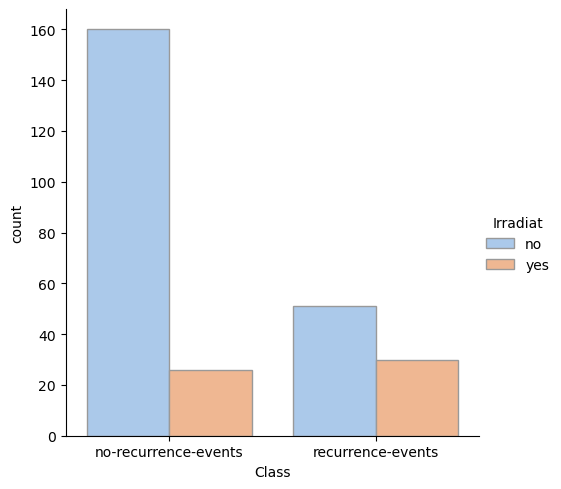

In [15]:
sns. catplot(x="Class", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation:From the above visualization irradiat vs Class we can see when the cancer is recurring, women are taking more radiation therapy

# 2: Chances of Taking or Not Taking radiation therapy based on Age

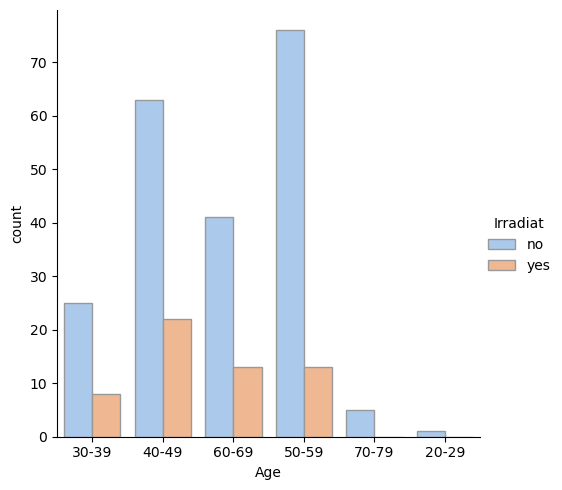

In [16]:
sns. catplot(x= "Age", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization irradiat vs Age we can see that age group of 50-59 are having cancer and they are taking less radiation therapy and age group of 40-49 are taking more Radiation therapy and age group of 70-79 are not at all preferring radiation therapy as many of them can not tolerate the radiation therapy although we know it is very critical 

# 3: Chances of Taking or Not Taking radiation therapy based on Menopause

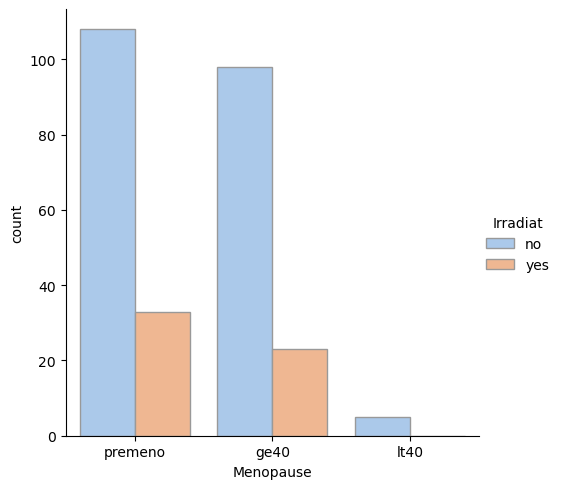

In [17]:
sns. catplot(x= "Menopause", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Menopause we can see that most women are not preferring Radiation therapy and very few women are preferring radiation therapy at the stage of premeno and ge40

# 4: Chances of Taking or Not Taking radiation therapy based on Tumor-size

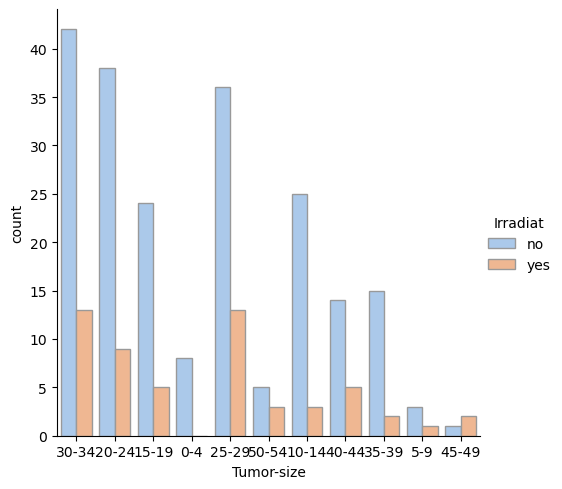

In [18]:
sns. catplot(x= "Tumor-size", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Tumor-size we can see what ever be the tumor size the chances of not taking radiation is always more .However compared to other tumer sizes, radiation is given more for the sizes 30-34 & 25-29

# 5: Chances of Taking or Not Taking radiation therapy based on Inv-nodes

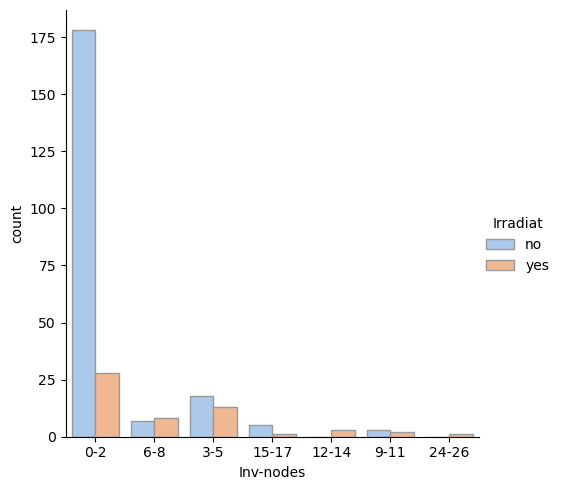

In [19]:
sns. catplot(x= "Inv-nodes", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Inv-nodes (Lymph nodes) we can see when only 0-2 lymph nodes are probably cancerous there is no need of radiation therapy

# 6: Chances of Taking or Not Taking radiation therapy based on Node-caps

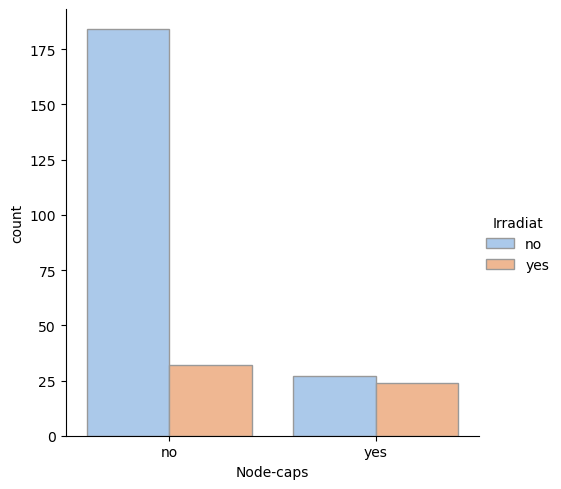

In [20]:
sns. catplot(x= "Node-caps", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Node-caps we can see that in case of presence of node caps there is an almost equal chances of taking or not taking radiation therapy, but if there is no node caps the chances of not taking radiation therapy is significantly higher  

# 7: Chances of Taking or Not Taking radiation therapy based on degree of malignancy

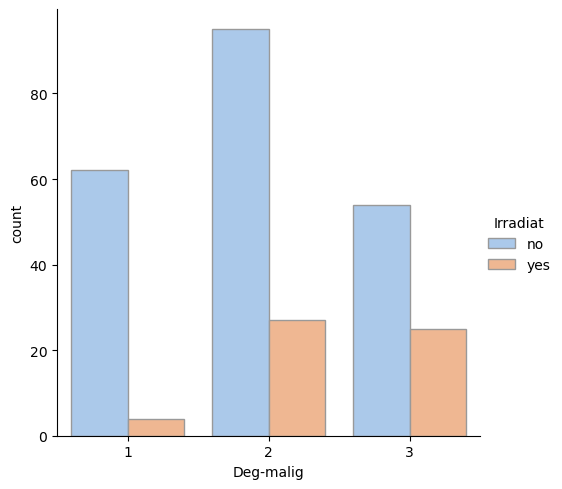

In [21]:
sns. catplot(x= "Deg-malig", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Degree of malignancy we can see that the ratio of not taking radiation therapy is higher compared to taking therapy in all degrees of malignancy. However, in degree 2, there are observed cases of taking the therapy more than degree 1 or 3

# 8: Chances of Taking or Not Taking radiation therapy based on breast

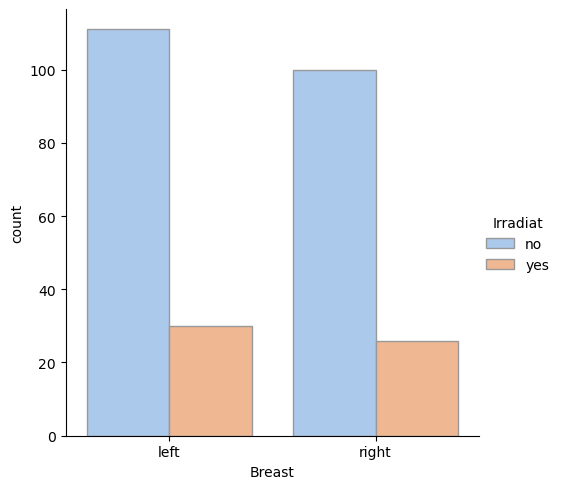

In [22]:
sns. catplot(x= "Breast", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Breast we can see that taking radiation therapy is not as such dependent on whether cancer is occurring on left or right breast 

# 9: Chances of Taking or Not Taking radiation therapy based on breast quad

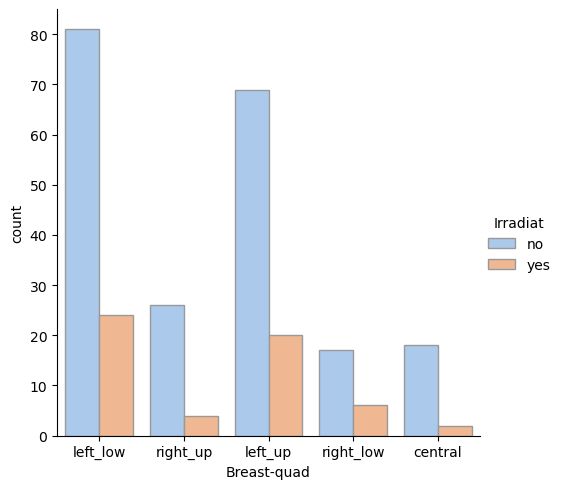

In [23]:
sns. catplot(x= "Breast-quad", hue="Irradiat", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Irradiat vs Breast-quad we can see that radiation therapy is taken more in the left breast(left_low, left_up) compare to the right quads

# Relation of the features with each other

# Visualization of Node-caps with Inv-Nodes

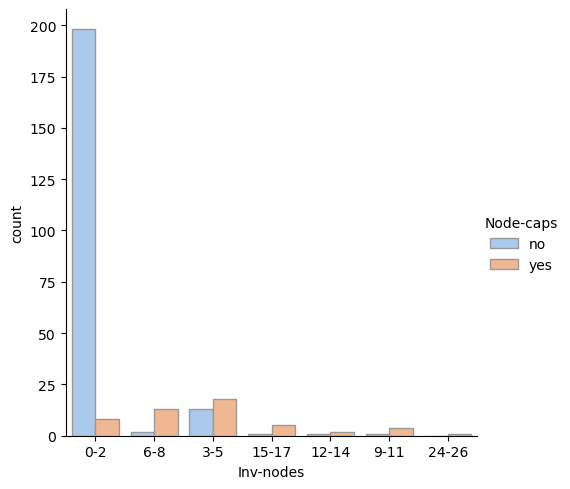

In [24]:
sns. catplot(x="Inv-nodes", hue="Node-caps", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Inv-nodes vs Node-caps we can see that if count of inv-nodes is 0-2 then there are almost no node-caps however if the numbers are between 3-5 or 6-8the chances of having node-caps increses 

# Visualization of Age with Menopause

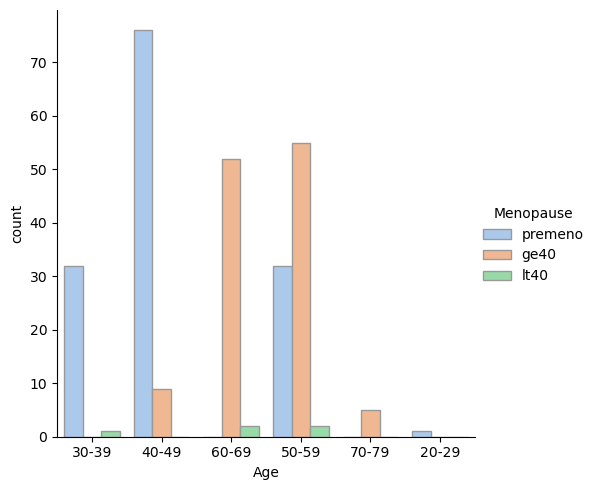

In [25]:
sns. catplot(x="Age", hue="Menopause", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Age vs Menopause we can see that below 40 years majority of women are in premeno stage while after 40 particularly after 60 years of age almost every women has reached menopause

# Visualization of Age with Tumor-size

<Axes: xlabel='Age', ylabel='Tumor-size'>

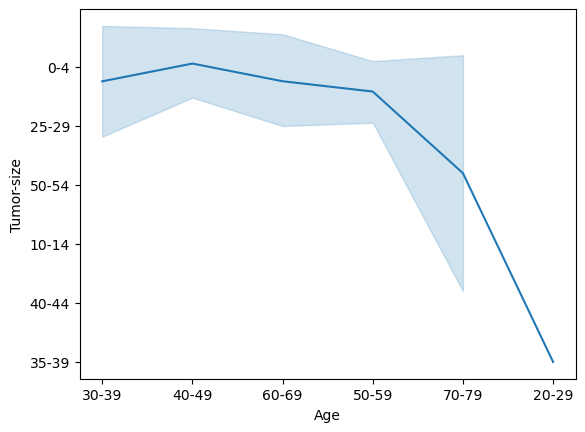

In [26]:
sns.lineplot(x="Age", y="Tumor-size", data=df)

# Observation: From the above visualization Age vs Menopause we can see that Age category of 20-29 have the largest tumor size and the age group 40-49 have the smallest tumor size

# Visualization of Deg-malig

<Axes: ylabel='Deg-malig'>

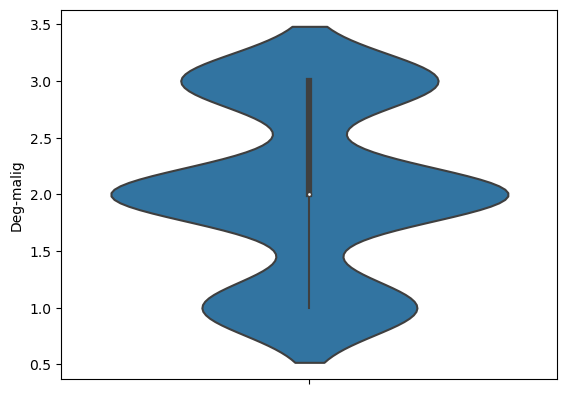

In [27]:
sns.violinplot( y="Deg-malig" , data = df)

# Observation: From the above visualization we can see most commonly occurring degree of malignancy is at degree of 2

# Visualization of Age with Deg-malig

<Axes: xlabel='Age', ylabel='Deg-malig'>

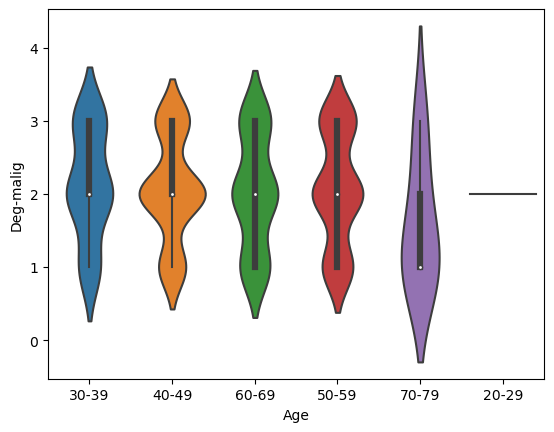

In [28]:
sns.violinplot(x="Age" , y="Deg-malig" , data = df)

# Observation: From the above visualization Age vs Degree of malignancy we can see age category 30- 69 encounters degree 2 and expectionally age categoery 70-79 encounters degree of malignancy 1

# Visualization of Class with Tumor-size

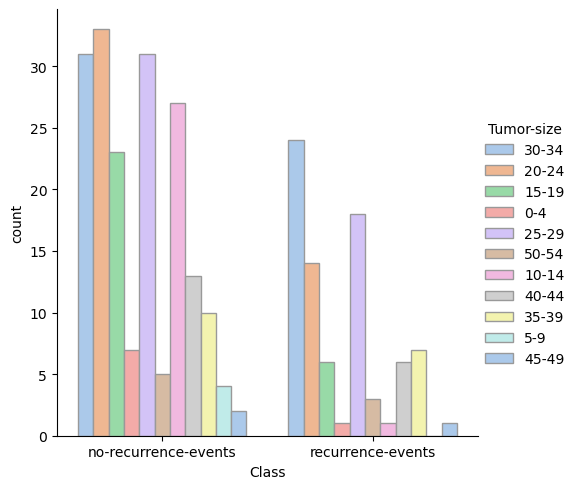

In [29]:
sns. catplot(x="Class", hue="Tumor-size", kind="count", palette="pastel", edgecolor=".6", data=df)

# Observation: From the above visualization Class vs tumor-size we can see in case of recurrence-events, tumor size is relatively smaller than in non-recurrence-events

# Feature Extraction

# As our data set is categorical so to see which columns or features are correlated or dependent to our target variable, we will use Chi-square Test and proceed further for our feature selection

# Chi-Square Test

As all the columns were categorical and we wanted to know the relationship between them, CHI-SQUARE TEST has been used. Testing the hypothesis to check if any variables are dependent on each other based on graphs above, Null hypothesis can be framed in the below manner: The grouping variables have no association or correlation amongst them. Alternate Hypothesis goes as framed below: The variables are associated with each other and happen to have a correlation between the variables. If the p-value is less than the assumed significance value (0.05), then we fail to accept that there is no association between the variables. That is, we reject the NULL hypothesis and accept the alternate hypothesis claim

# Dependency between Age and Irradiat

In [30]:
from scipy.stats import chi2_contingency

In [31]:
chisqt1 = pd.crosstab(df["Age"], df["Irradiat"])
print(chisqt1)

Irradiat  no  yes
Age              
20-29      1    0
30-39     25    8
40-49     63   22
50-59     76   13
60-69     41   13
70-79      5    0


In [32]:
stat, p, dof, expected=chi2_contingency(chisqt1)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.35459288868239697
ACCEPT NULL HYPOTHESIS


Conclusion: As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Age’ are independent of each other.

# Dependency between Class and Irradiat

In [33]:
chisqt2 = pd.crosstab(df["Class"], df["Irradiat"])
print(chisqt2)

Irradiat               no  yes
Class                         
no-recurrence-events  160   26
recurrence-events      51   30


In [34]:
stat, p, dof, expected=chi2_contingency(chisqt2)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 4.294577319315031e-05
Reject NULL HYPOTHESIS


Conclusion: As the p-value is less than 0.05, we reject the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Class’ are dependent of each other.

# Dependency between Tumor-size and Irradiat

In [35]:
chisqt3 = pd.crosstab(df["Tumor-size"], df["Irradiat"])
print(chisqt3)

Irradiat    no  yes
Tumor-size         
0-4          8    0
10-14       25    3
15-19       24    5
20-24       38    9
25-29       36   13
30-34       42   13
35-39       15    2
40-44       14    5
45-49        1    2
5-9          3    1
50-54        5    3


In [36]:
stat, p, dof, expected=chi2_contingency(chisqt3)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.30417279412605713
ACCEPT NULL HYPOTHESIS


Conclusion: As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Tumor-size’ are independent of each other.

# Dependency between Menopause and Irradiat

In [37]:
chisqt4 = pd.crosstab(df["Menopause"], df["Irradiat"])
print(chisqt4)

Irradiat    no  yes
Menopause          
ge40        98   23
lt40         5    0
premeno    108   33


In [38]:
stat, p, dof, expected=chi2_contingency(chisqt4)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.34792078095282974
ACCEPT NULL HYPOTHESIS


Conclusion: As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Menopause’ are independent of each other.

# Dependency between Inv-nodes and Irradiat

In [39]:
chisqt5 = pd.crosstab(df["Inv-nodes"], df["Irradiat"])
print(chisqt5)

Irradiat    no  yes
Inv-nodes          
0-2        178   28
12-14        0    3
15-17        5    1
24-26        0    1
3-5         18   13
6-8          7    8
9-11         3    2


In [40]:
stat, p, dof, expected=chi2_contingency(chisqt5)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 3.322011042098311e-07
Reject NULL HYPOTHESIS


Conclusion: As the p-value is less than 0.05, we reject the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Inv-nodes’ are dependent of each other.

# Dependency between Node-caps and Irradiat

In [41]:
chisqt6 = pd.crosstab(df["Node-caps"], df["Irradiat"])
print(chisqt6)

Irradiat    no  yes
Node-caps          
no         184   32
yes         27   24


In [42]:
stat, p, dof, expected=chi2_contingency(chisqt6)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 9.779248044713831e-07
Reject NULL HYPOTHESIS


Conclusion: As the p-value is less than 0.05, we reject the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Node-caps’ are dependent of each other.

# Dependency between Deg-malig and Irradiat

In [43]:
chisqt7 = pd.crosstab(df["Deg-malig"], df["Irradiat"])
print(chisqt7)

Irradiat   no  yes
Deg-malig         
1          62    4
2          95   27
3          54   25


In [44]:
stat, p, dof, expected=chi2_contingency(chisqt7)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.0007530576515843875
Reject NULL HYPOTHESIS


Conclusion: As the p-value is less than 0.05, we reject the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Deg-malig’ are dependent of each other.

# Dependency between Breast and Irradiat

In [45]:
chisqt8 = pd.crosstab(df["Breast"], df["Irradiat"])
print(chisqt8)

Irradiat   no  yes
Breast            
left      111   30
right     100   26


In [46]:
stat, p, dof, expected=chi2_contingency(chisqt8)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 1.0
ACCEPT NULL HYPOTHESIS


Conclusion: As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Breast’ are independent of each other.

# Dependency between Breast-quad and Irradiat

In [47]:
chisqt9 = pd.crosstab(df["Breast-quad"], df["Irradiat"])
print(chisqt9)

Irradiat     no  yes
Breast-quad         
central      18    2
left_low     81   24
left_up      69   20
right_low    17    6
right_up     26    4


In [48]:
stat, p, dof, expected=chi2_contingency(chisqt9)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.5220751406038084
ACCEPT NULL HYPOTHESIS


Conclusion: As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Irradiat’ and ‘Breast-quad’ are independent of each other.

Thus, 'Class','Inv-nodes','Node-caps' and 'deg-malig' and 'Irradiat' are correlated according to the Chi-square test , so for the further feature selection we will consider only these columns.

# Feature Engineering

# Data Preparation 

# For classification model building , converting String to Integer as String cannot be fit into classification model building

In [49]:
df["Class"] = df["Class"].map({"no-recurrence-events":0, "recurrence-events":1})
df.value_counts("Class")

Class
0    186
1     81
dtype: int64

In [50]:
df["Node-caps"] = df["Node-caps"].map({"no":0, "yes":1})
df.value_counts("Node-caps")

Node-caps
0    216
1     51
dtype: int64

In [51]:
df["Breast"] = df["Breast"].map({"right":0, "left":1})
df.value_counts("Breast")

Breast
1    141
0    126
dtype: int64

In [52]:
df["Irradiat"] = df["Irradiat"].map({"no":0, "yes":1})
df.value_counts("Irradiat")

Irradiat
0    211
1     56
dtype: int64

In [53]:
df["Menopause"] = df["Menopause"].map({"premeno": 0 , "ge40":50, "lt40":30 })
df.value_counts("Menopause")

Menopause
0     141
50    121
30      5
dtype: int64

In [54]:
df["Breast-quad"] = df["Breast-quad"].map({"right_up":0, "left_up":3, "right_low":1, "left_low":4, "central":5})
df.value_counts("Breast-quad")

Breast-quad
4    105
3     89
0     30
1     23
5     20
dtype: int64

In [55]:
df["Inv-nodes"] = df["Inv-nodes"].map({"0-2": 1 , "3-5":4, "6-8":7,"9-11":10,"15-17":16, "12-14":13,"24-26":25 })
df.value_counts("Inv-nodes")

Inv-nodes
1     206
4      31
7      15
16      6
10      5
13      3
25      1
dtype: int64

In [56]:
df["Tumor-size"] = df["Tumor-size"].map({"30-34": 32 , "25-29":27, "20-24":22, "15-19":17, "10-14":12, "40-44":42, "35-39":37, "0-4":2, "50-54":52, "5-9":7, "45-49":47})
df.value_counts("Tumor-size")

Tumor-size
32    55
27    49
22    47
17    29
12    28
42    19
37    17
2      8
52     8
7      4
47     3
dtype: int64

In [57]:
df["Age"] = df["Age"].map({"50-59": 54.5 , "40-49":44.5, "60-69":64.5, "30-39":34.5, "70-79":74.5, "20-29":24.5 })
df.value_counts("Age")

Age
54.5    89
44.5    85
64.5    54
34.5    33
74.5     5
24.5     1
dtype: int64

# Feature Selection

# Correlation matrix

We will agin do the correlation matrix as our data set is converted from categorical to numerical so now we can see by the correlation matrix which variables are dependent on our target variable. This matrix is also to gain confidence on the Chi-square-test we performed for feature selection 

<Axes: >

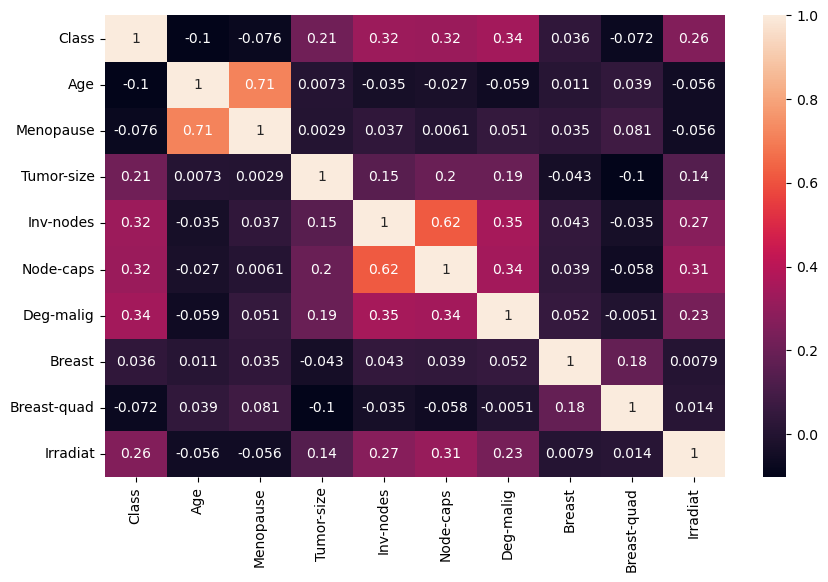

In [58]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

After checking with Chi-square test and verifying the dataset with Correlation, we found 'Class', 'Inv-nodes', 'Node-caps' and 'Deg-malig' these features are most important as our target variable is dependent mostly on these. So we take these four features as independent variable for model selection and evaluation.

# Importing train_test_split from scikit-learn library to split the data into train and test for our future prediction

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

# Defining our dependent and independent variables. Dependent variables are defined on X and independent variable is defined on Y

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        267 non-null    int64  
 1   Age          267 non-null    float64
 2   Menopause    267 non-null    int64  
 3   Tumor-size   267 non-null    int64  
 4   Inv-nodes    267 non-null    int64  
 5   Node-caps    267 non-null    int64  
 6   Deg-malig    267 non-null    int64  
 7   Breast       267 non-null    int64  
 8   Breast-quad  267 non-null    int64  
 9   Irradiat     267 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 21.0 KB


In [63]:
df.columns

Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps',
       'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],
      dtype='object')

In [64]:
x = df[['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps',
       'Deg-malig', 'Breast', 'Breast-quad']]
y = df[["Irradiat"]]

In [65]:
print(x)

     Class   Age  Menopause  Tumor-size  Inv-nodes  Node-caps  Deg-malig  \
0        0  34.5          0          32          1          0          3   
1        0  44.5          0          22          1          0          2   
2        0  44.5          0          22          1          0          2   
3        0  64.5         50          17          1          0          2   
4        0  44.5          0           2          1          0          2   
..     ...   ...        ...         ...        ...        ...        ...   
262      1  34.5          0          32          1          0          2   
263      1  34.5          0          22          1          0          3   
264      1  64.5         50          22          1          0          1   
265      1  44.5         50          32          4          0          3   
266      1  54.5         50          32          4          0          3   

     Breast  Breast-quad  
0         1            4  
1         0            0  
2     

In [66]:
print(y)

     Irradiat
0           0
1           0
2           0
3           0
4           0
..        ...
262         0
263         1
264         0
265         0
266         0

[267 rows x 1 columns]


# Splitting the data set into test and train for our future modelling

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [68]:
x_train

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
243,1,64.5,50,27,4,0,2,0,0
21,0,64.5,50,17,1,0,2,1,4
228,1,34.5,0,32,10,0,2,0,3
109,0,64.5,50,32,1,0,1,0,3
16,0,44.5,0,17,1,0,2,1,4
...,...,...,...,...,...,...,...,...,...
251,1,54.5,50,32,7,1,3,1,1
192,1,54.5,0,32,1,0,3,1,0
117,0,44.5,50,22,1,0,3,1,3
47,0,54.5,0,27,1,0,1,0,3


In [69]:
df.to_excel('output.xlsx', index=False)

In [70]:
y_train

,Irradiat
243,0
21,0
228,1
109,0
16,0
...,...
251,0
192,0
117,0
47,0


# Models We Considered are: 1.Logistic Regression, 2.DecisionTree

# Grid Search CV for Model Selection and Hyperparameter tuning for each model

# Grid searching key hyperparameter for logistic Regression Model

In [71]:
 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['none','l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_logistic = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_logistic.best_score_, grid_result_logistic.best_params_))
means = grid_result_logistic.cv_results_['mean_test_score']
stds = grid_result_logistic.cv_results_['std_test_score']
params = grid_result_logistic.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.795809 using {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.792203 (0.054556) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.777485 (0.073315) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.793957 (0.038928) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.793957 (0.041487) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.792203 (0.054556) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.793957 (0.041487) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.792203 (0.054556) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.781287 (0.067465) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792203 (0.054556) with: {'C': 10

# Observation: 0.790546 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

# Grid searching key hyperparameter for Decision Tree Classifier Model

In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import BaggingClassifier
# define dataset

# define models and parameters
#model = BaggingClassifier()
#n_estimators = [10, 100, 1000]
# define grid search
#grid = dict(n_estimators=n_estimators)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result_dt = grid_search.fit(x_train, y_train)
# summarize results
#print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))
#means = grid_result_dt.cv_results_['mean_test_score']
#stds = grid_result_dt.cv_results_['std_test_score']
#params = grid_result_dt.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

In [72]:
import pickle

In [73]:
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

In [74]:
pickle.dump(grid_result_logistic,open('biku4.sav','wb'))